# Prueba práctica 1: Modelos supervisados

Uno de los estudios que se da mucho en la actualidad trata del llamado `análisis de sentimientos`, que intenta predecir si un texto tiene un sentimiento positivo o negativo, por ejemplo, si hablamos de la visita a un restaurante podemos decir:

`La comida estuvo muy buena`--> que se sería una expresión positiva de su visita al restaurante.

`La atención fue horrible`--> que se sería una expresión negativa de su visita al restaurante.

`Sería malo no volver`--> acá como humanos podríamos decir que la expresión en postiva, pero como le indicamos a la máquina que es positiva tenemos la palabra `malo`.

El avance en este campo habla de `ngramas`, `stop word` que ayudan a limpiar el set con el objetivo de lograr un mayor `accuracy` y por consiguiente lograr mejor predicción por ejemplo en el análisis de una candidatura política en base a la opinión de la gente.

Por ello en esta evaluación se presenta un caso de `análisis de sentimientos` en base a 3 set de datos traducidos al español que contienen:

1.- Revisiones etiquetadas de IMDb, Amazon y Yelp. 
2.- Cada revisión está marcada con una puntuación de 0 para un sentimiento negativo o 1 para un sentimiento positivo.

Esta prueba refuerza los conceptos de _aprendizaje supervisado_ utilizando las librerías de `sklearn`, `pandas`, `numpy` y una librería muy conocida para el análisis de texto como es la `nltk` que pueden instalar todas sus funciones con:

conda install -c anaconda nltk

conda install stop-words

conda install -c anaconda unidecode o pip install Unidecode

Si desean mejorar la limpieza del texto pueden instalar la componente `spacy_spanish_lemmatizer` con:

pip install spacy-spanish-lemmatizer


### Se le pide realizar el análisis de sentimientos con los modelos de machine learning aprendidos en clase,  debe netrenar tres modelos diferentes que tendrán como meta superar el accuracy del modelo inicial de regresión logística realizado. Admás debe agregar el código faltante en cada celda que se solicita, asi como responder las preguntas planteadas

Nota: Los análisis de texto se encuentran ya realizados, sólo si desea mejorar puede lematizar el texto (investigue lo que significa)

In [28]:
import numpy as np
import pandas as pd

### complete el código que falta

In [29]:
archivos = {'yelp':   'C:/yelp_labelledes.csv',
            'amazon': 'C:/amazon_cells_labelledes.csv',
            'imdb': 'C:/imdb_labelledes.csv'}

data_list = []
for source, filepath in archivos.items():
    data = pd.read_csv(filepath, names=['sentence', 'label'], sep='\t')
    data['source'] = source  # Add another column filled with the source name
    data_list.append(data)

data = pd.concat(data_list)
print(data.iloc[0])
print('Número de datos Cargados: {num}'.format(num=data.shape[0]))
data.sample(5)

sentence    Wow ... Me encantó este lugar.
label                                    1
source                                yelp
Name: 0, dtype: object
Número de datos Cargados: 3000


,sentence,label,source
190,El reemplazo murió en unas pocas semanas.,0,amazon
51,Buena protección y no hace que el teléfono sea...,1,amazon
884,Esta es probablemente una de las películas men...,0,imdb
602,También tienen el mejor queso crujiente de la ...,1,yelp
114,Buenos precios.,1,yelp


### Que se intenta realizar en la celda:

##### Respuesta: ...

In [30]:
col = ['sentence', 'label','source']
data1 = data[col]
data1.dropna()
data1 = data1[data1['label'].isnull()==False]
data1 = data1[data1['sentence'].isnull()==False]
print('Número de datos a procesar: {num}'.format(num=data1.shape[0]))
data1.head(5)

Número de datos a procesar: 3000


,sentence,label,source
0,Wow ... Me encantó este lugar.,1,yelp
1,La corteza no es buena.,0,yelp
2,No sabroso y la textura era simplemente desagr...,0,yelp
3,Me detuve durante las vacaciones de fines de m...,1,yelp
4,"La selección en el menú era genial, al igual q...",1,yelp


### Que se intenta realizar en la celda:

##### Respuesta: ...

In [31]:
data2 = data1[['label', 'sentence','source']].drop_duplicates(subset=['label', 'sentence', 'source'])

#Desbloqueando la siguiente sentencia puede analizar sólo uno de los set de datos.
#data2 = data2[data2['source']=='amazon']

print('Número de datos a procesar: {num}'.format(num=data2.shape[0]))
data2.head(5)


Número de datos a procesar: 2969


,label,sentence,source
0,1,Wow ... Me encantó este lugar.,yelp
1,0,La corteza no es buena.,yelp
2,0,No sabroso y la textura era simplemente desagr...,yelp
3,1,Me detuve durante las vacaciones de fines de m...,yelp
4,1,"La selección en el menú era genial, al igual q...",yelp


### Que se intenta realizar en la celda:

##### Respuesta: ...

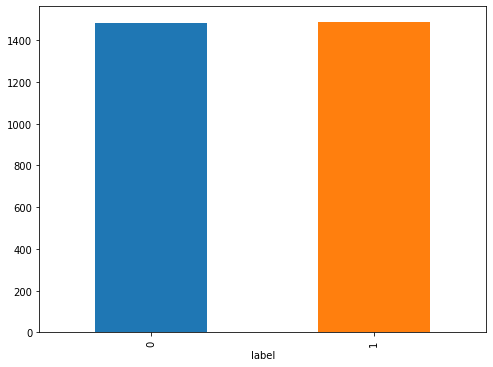

In [32]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
data2.groupby('label').sentence.count().plot.bar(ylim=0)
plt.show()

### Que se intenta realizar en la celda:

##### Respuesta: ...

In [33]:
coment = [tuple(x) for x in data2[['label', 'sentence']].values]
print('Número de comentarios Cargados: {num}'.format(num=len(coment)))

Número de comentarios Cargados: 2969


In [34]:
print(coment[10])

(1, 'El servicio fue muy rápido.')


### Intente responder que se esta realizando en la celda de mas abajo (tendrá puntos adicionales si su respuesta es correcta), debe describir paso a paso que se realiza

##### Respuesta: ...

In [35]:
import numpy as np
import spacy
import string
import re
from unicodedata import normalize

# Desbloquee para lematizar
#import spacy_spanish_lemmatizer

import nltk
nltk.download('stopwords')
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords

# Desbloquee para lematizar
#nlp = spacy.load("es_core_news_sm")
#nlp.replace_pipe("lemmatizer", "spanish_lemmatizer")

from tqdm import tqdm
en_stop = set(stopwords.words('spanish'))
#ignore_frase =  [']
ignore_words = ['?','!', '¿','¡', 'hola', 'chao','comida', 'bebidas','vino','bistec','tambien','mesa','silla','bastante','cerveza']
e_palabra_caracter_intermedio = ["@","°", "º","_"]
e_palabra_caracter_inicial = ["http", "https", "º", "°"]
e_palabra_caracter_final = [".com",".cl",".org","º", "°"]

X = [doc[1] for doc in coment]
y = np.array([doc[0] for doc in coment])


def normalizar(sentenses):
    """normalizamos la lista de frases y devolvemos la misma lista de frases normalizada"""
    for index, sentense in enumerate(tqdm(sentenses)):
        lema = ''
        if type(sentense) != int:
            s = re.sub(
                    r"([^n\u0300-\u036f]|n(?!\u0303(?![\u0300-\u036f])))[\u0300-\u036f]+", r"\1", 
                    normalize( 'NFD', sentense), 0, re.I
                )
            sentense = normalize( 'NFC', s)
            regex = re.compile("|".join(f"\S+{cad}\S+" for cad in e_palabra_caracter_intermedio))
            sentense = regex.sub("", sentense)
            regex = re.compile("|".join(f"{cad}\S+" for cad in e_palabra_caracter_inicial))
            sentense = regex.sub("", sentense)
            regex = re.compile('|'.join(f"\S+{cad}" for cad in e_palabra_caracter_final))
            sentense = regex.sub("", sentense).replace("  ", " ")
            t = str.maketrans(dict.fromkeys('0123456789',""))
            sentense = sentense.lower().replace('.','. ').replace('\xa0','. ').replace('-','. ').replace('\n','').strip()
            
            #Si desea eliminar frases puede desbloquear las siguiente sentencias
            #sentense = sentense.translate(t)
            #sentense = sent_tokenize(sentense)
            #sentense = ''.join([fra for fra in sentense if fra not in ignore_frase])
            
            sentense = sentense.replace('.',' ').replace('-','').replace('"','').replace('º','').replace('°','').strip()
            sentense = sentense.translate(t)
            word_tokens = word_tokenize(sentense)

            sentenses[index] = ' '.join([word for word in word_tokens if word not in ignore_words 
                                        and word not in en_stop
                                        and word not in string.punctuation])

            #Si desea lematizar puede desbloquear las siguientes sentencias y cambiar la sentencia de arriba por "sentense =""
            # dado que el lema sería el encargado de colocar el dato final en el vector  sentenses[index](advertencia es muy lento)
           # for token in nlp(sentense):
            #    lema = lema + ' ' + token.lemma_
            #sentenses[index] = lema

    return sentenses


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\m_mir\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [36]:
## Normalizo mi set de datos
X_norm = normalizar(X)

100%|████████████████████████████████████████████████████████████████████████████| 2969/2969 [00:00<00:00, 3775.44it/s]


In [37]:
#Imprimo algún dato para saber como quedó después de la normalización
print(X_norm[300])
print(coment[300])
print(X[300])
print(y[300])

buena seleccion buena seleccion ida
(1, 'Buena cerveza y selección de bebidas y buena selección de comida.')
buena seleccion buena seleccion ida
1


### Que se realiza en la siguiente celda?. Fundamente su respuesta técnicamente

##### Respuesta: ...

In [38]:
from sklearn.model_selection import train_test_split
seed = 1500
validation_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X_norm,y,test_size=validation_size, shuffle=True, random_state=seed)
print('comentarios de entrenamiento: {}'.format(len(X_train)))
print('comentarios de Test: {}'.format(len(X_test)))

comentarios de entrenamiento: 2375
comentarios de Test: 594


### Invetigue lo que realiza la celda siguiente. Tendrá puntos adicionales

##### Respuesta: ...

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
vectorizer.fit(X_norm)
X_train_V = vectorizer.transform (X_train)
X_test_V = vectorizer.transform (X_test)
print(X_train_V.shape)
print(X_test_V.shape)

(2375, 5707)
(594, 5707)


### En este punto comienza el programa, con definiciones de componentes y funciones

In [40]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
import itertools

LABELS = ["Sentimiento Negativo","Sentimiento Positivo"]
scoring_def = 'accuracy'
skf = StratifiedKFold(n_splits=4)

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print('Matriz de confusión Normalizada')
    else:
        print('Matriz de confusión sin normalizar')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### La siguiente celda cuenta tiene un el código de una regresión logística aplicada al análisis de sentimientos la que genera una predicción bastante baja aproximadamente un 52% de accuracy lo que es muy bajo.

### Su meta en esta prueba es superar este bajo accuracy entrenando mínimamente tres modelos


In [41]:
#params = {"max_iter": [100],
#          "penalty": ['l1', 'l2'],
#          "class_weight": ['None','balanced'],
#          "solver" : ['newton-cg','lbfgs','liblinear','sag','saga'],
#          "C": [1, 2, 3]} 

model_ml = LogisticRegression() 
#grid = GridSearchCV(estimator=model_ml, param_grid=params,cv=skf, scoring=scoring_def)
#grid.fit(X_train_V, y_train)
model_ml.fit(X_train_V, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Mejor scoring de acuerdo a la medida seleccionada:  accuracy
<bound method ClassifierMixin.score of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)>
              precision    recall  f1-score   support

           0       0.76      0.78      0.77       304
           1       0.76      0.74      0.75       290

    accuracy                           0.76       594
   macro avg       0.76      0.76      0.76       594
weighted avg       0.76      0.76      0.76       594

Matriz de confusión sin normalizar
[[237  67]
 [ 75 215]]


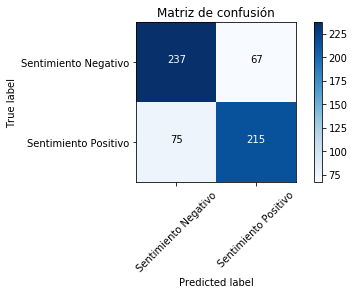

In [42]:
print("Mejor scoring de acuerdo a la medida seleccionada: ", scoring_def)
#print(grid.best_score_)
print(model_ml.score)
#print("Parámetros del mejor modelo")
#print(grid.best_params_)
#Yhat = grid.best_estimator_.predict(X_test_V)
Yhat = model_ml.predict(X_test_V)
print(classification_report(y_test, Yhat))
cnf_matrix = confusion_matrix(y_test, Yhat)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=LABELS,
                      title='Matriz de confusión')
plt.show()

In [43]:
#También puede colocar una opinión nueva entre []
opinion = [X_test[297]]
opinion_norm = vectorizer.transform (normalizar(opinion))
pred = grid.best_estimator_.predict(opinion_norm)
print("Opinión: ", opinion)
print("Sentimiento real: ", y_test[297])
print("Sentimiento predicho: ", pred)

100%|████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]

Opinión:  ['creo pitch black hizo bien']
Sentimiento real:  1
Sentimiento predicho:  [1]
